In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math 

# Barebone notations
labels = ["Off-Peak(12:00 A.M.)", "Moderately-Peak(3:00 P.M.)", "High-Peak(6:00 P.M.)"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

def autolabel(rects, ax, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

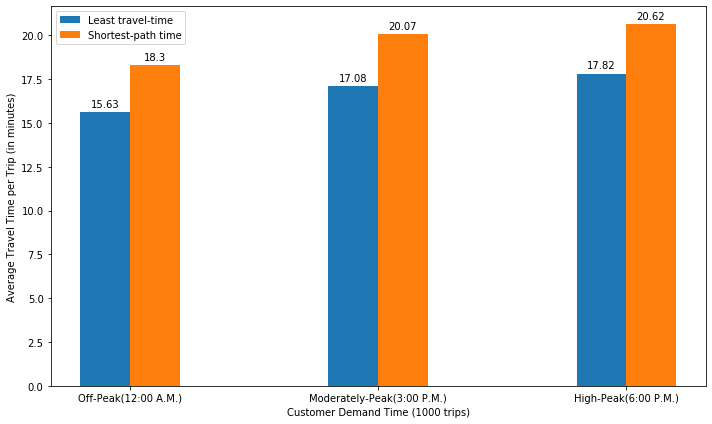

In [30]:
shortest = [1098/60, 1204/60, 1237/60]
least = [938/60, 1025/60, 1069/60]

fig, ax = plt.subplots(figsize=(10,6))
rects2 = ax.bar(x - width/2, least, width, label='Least travel-time')
rects1 = ax.bar(x + width/2, shortest, width, label='Shortest-path time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Travel Time per Trip (in minutes)')
ax.set_xlabel('Customer Demand Time (1000 trips)')
# ax.set_title('Shortest path length travel-time VS Optimal travel-time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1, ax)
autolabel(rects2, ax)

fig.tight_layout()

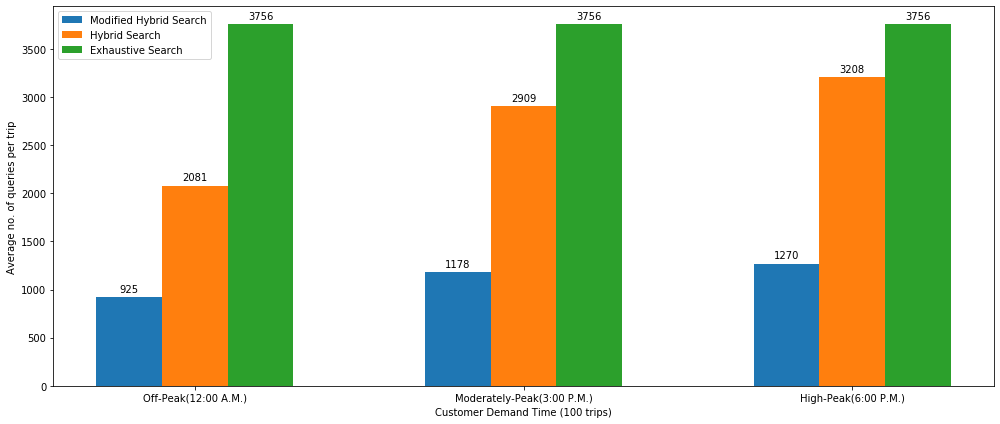

In [27]:
mhq = [925, 1178, 1270]
hq = [2081, 2909, 3208]
eq = [3756, 3756, 3756]

fig2, ax2 = plt.subplots(figsize=(14,6))
rects5 = ax2.bar(x - width, mhq, width, label='Modified Hybrid Search')
rects4 = ax2.bar(x, hq, width, label='Hybrid Search')
rects3 = ax2.bar(x + width, eq, width, label='Exhaustive Search')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Average no. of queries per trip')
ax2.set_xlabel('Customer Demand Time (100 trips)')
# ax2.set_title('No. of queries: Modified Hybrid Search VS Hybrid Search VS Exhaustive Search')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend(loc='upper left')

autolabel(rects3, ax2)
autolabel(rects4, ax2)
autolabel(rects5, ax2)
fig2.tight_layout()

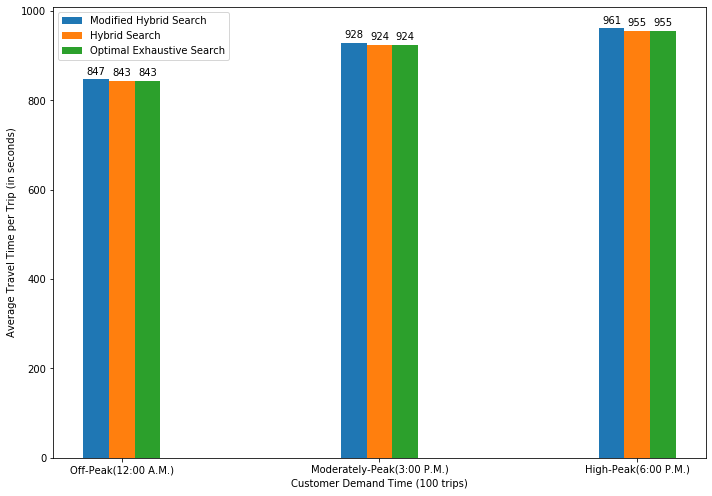

In [23]:
mht= [847, 928, 961]
ht = [843, 924, 955]

fig1, ax1 = plt.subplots(figsize=(10,7))
rects2 = ax1.bar(x - width, mht, width, label='Modified Hybrid Search')
rects1 = ax1.bar(x, ht, width, label='Hybrid Search')
rects6 = ax1.bar(x + width, ht, width, label='Optimal Exhaustive Search')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Average Travel Time per Trip (in seconds)')
ax1.set_xlabel('Customer Demand Time (100 trips)')
# ax1.set_title('Travel-times: Modified Hybrid Search VS Hybrid Search VS Exhaustive Search')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left')

autolabel(rects1, ax1)
autolabel(rects2, ax1)
autolabel(rects6, ax1)
fig1.tight_layout()

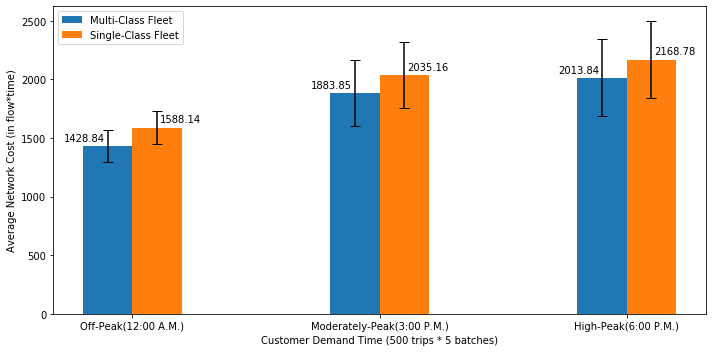

In [6]:
# Flow time cost notations
c_s_off = [1324136, 8982070, 5382053, 4199915, 5831024]
c_u_off = [4011550, 9192363, 5436125, 4203068, 5743470]
c_s_mod = [1499102, 16524830, 5829948, 4456619, 5598741]
c_u_mod = [3968706, 16817539, 5888260, 4438451, 5519899]
c_s_high = [1376534, 18603939, 6012411, 4434863, 5821450]
c_u_high = [3847404, 18953706, 6076663, 4407829, 5752411]

multi = [np.mean(c_s_off)/3600, np.mean(c_s_mod)/3600, np.mean(c_s_high)/3600]
single = [np.mean(c_u_off)/3600, np.mean(c_u_mod)/3600, np.mean(c_u_high)/3600]

s_error = [np.std(c_s_off)/(3600*5), np.std(c_s_mod)/(3600*5), np.std(c_s_high)/(3600*5)]
u_error = [np.std(c_u_off)/(3600*5), np.std(c_u_mod)/(3600*5), np.std(c_u_high)/(3600*5)]

fig2, ax2 = plt.subplots(figsize=(10,5))
rects3 = ax2.bar(x - width/2, multi, width, yerr=s_error, capsize=5, label='Multi-Class Fleet')
rects4 = ax2.bar(x + width/2, single, width, yerr=s_error, capsize=5, label='Single-Class Fleet')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Average Network Cost (in flow*time)')
ax2.set_xlabel('Customer Demand Time (500 trips * 5 batches)')
# ax1.set_title('Total Cost: Multi-Class VS Single-Class')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend(loc='upper left')

autolabel(rects3, ax2, 'left')
autolabel(rects4, ax2, 'right')
fig2.tight_layout()

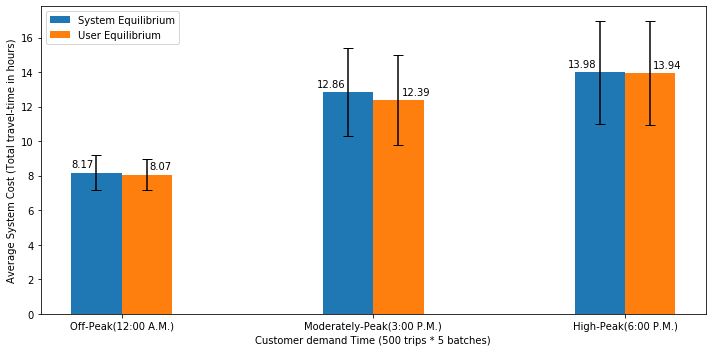

In [9]:
#System Cost Notations
cost_s_off = [5708, 58941, 28454, 16746, 37289]
cost_u_off = [11723, 57606, 26357, 14743, 34747]
cost_s_mod = [7648, 136095, 33328, 18558, 35918]
cost_u_mod = [11144, 136211, 30949, 11648, 33130]
cost_s_high = [6308, 154950, 34535, 18380, 37545]
cost_u_high = [10552, 156381, 32102, 16202, 35648]

s = [np.mean(cost_s_off)/3600, np.mean(cost_s_mod)/3600, np.mean(cost_s_high)/3600]
u = [np.mean(cost_u_off)/3600, np.mean(cost_u_mod)/3600, np.mean(cost_u_high)/3600]

cost_error_s = [np.std(cost_s_off)/(3600*5), np.std(cost_s_mod)/(3600*5), np.std(cost_s_high)/(3600*5)]
cost_error_u = [np.std(cost_u_off)/(3600*5), np.std(cost_u_mod)/(3600*5), np.std(cost_u_high)/(3600*5)]

fig3, ax3 = plt.subplots(figsize=(10,5))
rects5 = ax3.bar(x - width/2, s, width, yerr=cost_error_s, capsize=5, label='System Equilibrium')
rects6 = ax3.bar(x + width/2, u, width, yerr=cost_error_u, capsize=5, label='User Equilibrium')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax3.set_ylabel('Average System Cost (Total travel-time in hours)')
ax3.set_xlabel('Customer demand Time (500 trips * 5 batches)')
# ax3.set_title('System Cost: System Equilibrium VS User Equilibrium')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.legend(loc='upper left')

autolabel(rects5, ax3, 'left')
autolabel(rects6, ax3, 'right')
fig3.tight_layout()

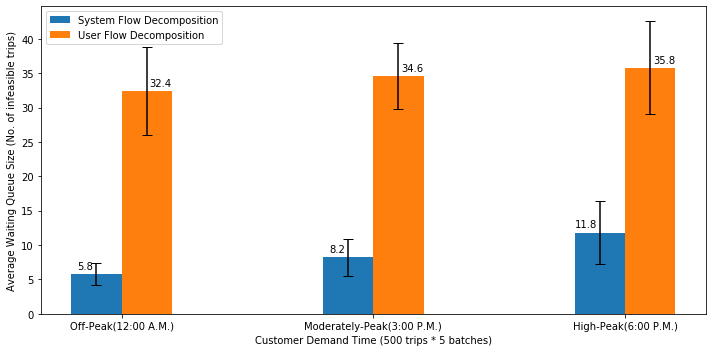

In [31]:
# Waiting Queue Notations
wq_s_off = [1, 5, 5, 11, 7]
wq_u_off = [43, 17, 36, 48, 18]
wq_s_mod = [1, 3, 14, 10, 13]
wq_u_mod = [43, 22, 35, 47, 26]
wq_s_high = [1, 8, 14, 28, 8]
wq_u_high = [53, 16, 32, 49, 29]

s_waiting_queue = [np.mean(wq_s_off), np.mean(wq_s_mod), np.mean(wq_s_high)] 
u_waiting_queue = [np.mean(wq_u_off), np.mean(wq_u_mod), np.mean(wq_u_high)]

wq_error_s = [np.std(wq_s_off)/2, np.std(wq_s_mod)/2, np.std(wq_s_high)/2]
wq_error_u = [np.std(wq_u_off)/2, np.std(wq_u_mod)/2, np.std(wq_u_high)/2]

fig1, ax1 = plt.subplots(figsize=(10,5))
rects1 = ax1.bar(x - width/2, s_waiting_queue, width, yerr=wq_error_s, capsize=5, label='System Flow Decomposition')
rects2 = ax1.bar(x + width/2, u_waiting_queue, width, yerr=wq_error_u, capsize=5, label='User Flow Decomposition')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Average Waiting Queue Size (No. of infeasible trips)')
ax1.set_xlabel('Customer Demand Time (500 trips * 5 batches)')
# ax1.set_title('Waiting Queue Size: Multi-Class System Equilibrium VS Single-Class User Equilibrium')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left')

autolabel(rects1, ax1, 'left')
autolabel(rects2, ax1, 'right')
fig1.tight_layout()